In [1]:
# Packages laden
import pandas as pd
import numpy as np
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten, Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.backend import binary_crossentropy
from matplotlib import pyplot as plt
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True,)

In [47]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [48]:
ZR = ZR.reshape((len(ZR), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(ZR)
ZR_N = scaler.transform(ZR)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [49]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR
ZR_46=ZR[-400:]
ZR_12=ZR[-100:]

# Anteil der Datensätze am Gesamtdatensatz: normalisierte Daten
ZR_N100=ZR_N
ZR_N46=ZR_N[-400:]
ZR_N12=ZR_N[-100:]

In [50]:
# Preprocessing der Rohdaten: 100%
ZR_100new=np.atleast_2d(ZR_N100)
if ZR_100new.shape[0]==1:
    ZR_100new=ZR_100new.T
nb_samples_100, nb_series_100 = ZR_100new.shape

In [51]:
# Preprocessing der Rohdaten: 46%
ZR_46new=np.atleast_2d(ZR_N46)
if ZR_46new.shape[0]==1:
    ZR_46new=ZR_46new.T
nb_samples_46, nb_series_46 = ZR_46new.shape

In [52]:
# Preprocessing der Rohdaten: 12%
ZR_12new=np.atleast_2d(ZR_N12)
if ZR_12new.shape[0]==1:
    ZR_12new=ZR_12new.T
nb_samples_12, nb_series_12 = ZR_12new.shape

In [53]:
# Einteilung in Trainings- und Testdaten:normalisierte Daten
test_size_100=int(0.3*nb_samples_100)
train_100, test_100 = ZR_N100[:-test_size_100], ZR_N100[-test_size_100:] 

test_size_46=int(0.35*nb_samples_46)
train_46, test_46 = ZR_N46[:-test_size_46], ZR_N46[-test_size_46:]

test_size_12=int(0.35*nb_samples_12)
train_12, test_12 = ZR_N12[:-test_size_12], ZR_N12[-test_size_12:]

In [54]:
# Einteilung in Trainings- und Testdaten:originale Daten
train_100_O, test_100_O = ZR_100[:-test_size_100], ZR_100[-test_size_100:] 

train_46_O, test_46_O = ZR_46[:-test_size_46], ZR_46[-test_size_46:]

train_12_O, test_12_O = ZR_12[:-test_size_12], ZR_12[-test_size_12:]

In [55]:
# Shape des Input und Outputs anpassen: 100%
look_forward=1
window_size=12
# Trainingsdaten
Xtrain_100=np.atleast_3d(np.array([train_100[start:start+window_size] for start in range(0, train_100.shape[0]-(window_size+look_forward))]))
ytrain_100=train_100[window_size+look_forward:]
qtrain_100=np.atleast_3d([train_100[-(window_size):]])
print(qtrain_100.shape, ytrain_100.shape, Xtrain_100.shape)

# Testdaten
Xtest_100=np.atleast_3d(np.array([test_100[start:start+window_size] for start in range(0, test_100.shape[0]-(window_size+look_forward))]))
ytest_100=test_100[window_size+look_forward:]
qtest_100=np.atleast_3d([test_100[-(window_size):]])
print(qtest_100.shape, ytest_100.shape, Xtest_100.shape)

(1, 12, 1) (592, 1) (592, 12, 1)
(1, 12, 1) (245, 1) (245, 12, 1)


In [56]:
# Shape des Input und Outputs anpassen: 46%
# Trainingsdaten
Xtrain_46=np.atleast_3d(np.array([train_46[start:start+window_size] for start in range(0, train_46.shape[0]-(window_size+look_forward))]))
ytrain_46=train_46[window_size+look_forward:]
qtrain_46=np.atleast_3d([train_46[-(window_size):]])
print(qtrain_46.shape, ytrain_46.shape, Xtrain_46.shape)

# Testdaten
Xtest_46=np.atleast_3d(np.array([test_46[start:start+window_size] for start in range(0, test_46.shape[0]-(window_size+look_forward))]))
ytest_46=test_46[window_size+look_forward:]
qtest_46=np.atleast_3d([test_46[-(window_size):]])
print(qtest_46.shape, ytest_46.shape, Xtest_46.shape)

(1, 12, 1) (247, 1) (247, 12, 1)
(1, 12, 1) (127, 1) (127, 12, 1)


In [57]:
# Shape des Input und Outputs anpassen: 12%
# Trainingsdaten
Xtrain_12=np.atleast_3d(np.array([train_12[start:start+window_size] for start in range(0, train_12.shape[0]-(window_size+look_forward))]))
ytrain_12=train_12[window_size+look_forward:]
qtrain_12=np.atleast_3d([train_12[-(window_size):]])
print(qtrain_12.shape, ytrain_12.shape, Xtrain_12.shape)

# Testdaten
Xtest_12=np.atleast_3d(np.array([test_12[start:start+window_size] for start in range(0, test_12.shape[0]-(window_size+look_forward))]))
ytest_12=test_12[window_size+look_forward:]
qtest_12=np.atleast_3d([test_12[-(window_size):]])
print(qtest_12.shape, ytest_12.shape, Xtest_12.shape)

(1, 12, 1) (52, 1) (52, 12, 1)
(1, 12, 1) (22, 1) (22, 12, 1)


In [58]:
ytrain_100_O=train_100_O[window_size+look_forward:]
ytest_100_O=test_100_O[window_size+look_forward:]

ytrain_46_O=train_46_O[window_size+look_forward:]
ytest_46_O=test_46_O[window_size+look_forward:]

ytrain_12_O=train_12_O[window_size+look_forward:]
ytest_12_O=test_12_O[window_size+look_forward:]

In [83]:
# Modell zusammenbauen: 
nb_filter_1=32
nb_filter_2=64
nb_filter_3=64
filter_length=2
nb_input_series=1
nb_outputs=1
model= Sequential()
model.add(Convolution1D(nb_filter=nb_filter_1, filter_length=filter_length, activation='sigmoid', 
                        input_shape=(window_size, nb_input_series)))
model.add(Convolution1D(nb_filter=nb_filter_2, filter_length=filter_length, activation='sigmoid'))
model.add(MaxPooling1D())
model.add(Convolution1D(nb_filter=nb_filter_3, filter_length=filter_length, activation='sigmoid'))
model.add(MaxPooling1D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(nb_outputs, activation='linear')) 
model.compile(loss='mse', optimizer='adam', metrics=['mae']) 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="sigmoid", input_shape=(12, 1), filters=32, kernel_size=2)`
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="sigmoid", filters=64, kernel_size=2)`
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="sigmoid", filters=64, kernel_size=2)`
  del sys.path[0]


In [16]:
# Modellzusammenfassung
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 11, 32)            96        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 4, 64)             8256      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
__________

In [169]:
# Replizierbarkeit gewährleisten
np.random.seed(9)

In [170]:
# Modellanpassen: 100%
history_reg=model.fit(Xtrain_100, ytrain_100, epochs=200, batch_size=25, validation_data=(Xtest_100, ytest_100))

Train on 592 samples, validate on 245 samples
Epoch 1/200
592/592 [==============================] - 0s 412us/step - loss: 0.0021 - mean_absolute_error: 0.0366 - val_loss: 0.0075 - val_mean_absolute_error: 0.0744
Epoch 2/200
592/592 [==============================] - 0s 410us/step - loss: 0.0023 - mean_absolute_error: 0.0383 - val_loss: 0.0067 - val_mean_absolute_error: 0.0695
Epoch 3/200
592/592 [==============================] - 0s 378us/step - loss: 0.0024 - mean_absolute_error: 0.0386 - val_loss: 0.0074 - val_mean_absolute_error: 0.0740
Epoch 4/200
592/592 [==============================] - 0s 356us/step - loss: 0.0023 - mean_absolute_error: 0.0380 - val_loss: 0.0077 - val_mean_absolute_error: 0.0757
Epoch 5/200
592/592 [==============================] - 0s 467us/step - loss: 0.0026 - mean_absolute_error: 0.0402 - val_loss: 0.0071 - val_mean_absolute_error: 0.0719
Epoch 6/200
592/592 [==============================] - 0s 394us/step - loss: 0.0023 - mean_absolute_error: 0.0376 - val

Epoch 98/200
592/592 [==============================] - 0s 376us/step - loss: 0.0022 - mean_absolute_error: 0.0373 - val_loss: 0.0066 - val_mean_absolute_error: 0.0683
Epoch 99/200
592/592 [==============================] - 0s 380us/step - loss: 0.0026 - mean_absolute_error: 0.0411 - val_loss: 0.0077 - val_mean_absolute_error: 0.0757
Epoch 100/200
592/592 [==============================] - 0s 341us/step - loss: 0.0021 - mean_absolute_error: 0.0368 - val_loss: 0.0072 - val_mean_absolute_error: 0.0724
Epoch 101/200
592/592 [==============================] - 0s 336us/step - loss: 0.0022 - mean_absolute_error: 0.0367 - val_loss: 0.0071 - val_mean_absolute_error: 0.0719
Epoch 102/200
592/592 [==============================] - 0s 364us/step - loss: 0.0021 - mean_absolute_error: 0.0367 - val_loss: 0.0068 - val_mean_absolute_error: 0.0699
Epoch 103/200
592/592 [==============================] - 0s 353us/step - loss: 0.0022 - mean_absolute_error: 0.0382 - val_loss: 0.0073 - val_mean_absolute_er

592/592 [==============================] - 0s 399us/step - loss: 0.0022 - mean_absolute_error: 0.0369 - val_loss: 0.0067 - val_mean_absolute_error: 0.0691
Epoch 195/200
592/592 [==============================] - 0s 399us/step - loss: 0.0024 - mean_absolute_error: 0.0391 - val_loss: 0.0072 - val_mean_absolute_error: 0.0723
Epoch 196/200
592/592 [==============================] - 0s 439us/step - loss: 0.0023 - mean_absolute_error: 0.0382 - val_loss: 0.0072 - val_mean_absolute_error: 0.0720
Epoch 197/200
592/592 [==============================] - 0s 373us/step - loss: 0.0022 - mean_absolute_error: 0.0373 - val_loss: 0.0071 - val_mean_absolute_error: 0.0714
Epoch 198/200
592/592 [==============================] - 0s 392us/step - loss: 0.0021 - mean_absolute_error: 0.0360 - val_loss: 0.0077 - val_mean_absolute_error: 0.0752
Epoch 199/200
592/592 [==============================] - 0s 395us/step - loss: 0.0025 - mean_absolute_error: 0.0400 - val_loss: 0.0072 - val_mean_absolute_error: 0.0720


Text(0.5,1,'Loss Curves')

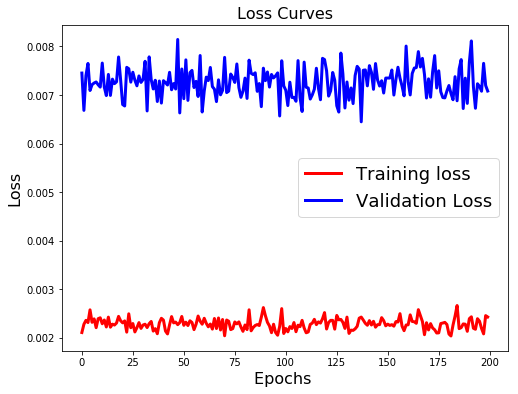

In [171]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

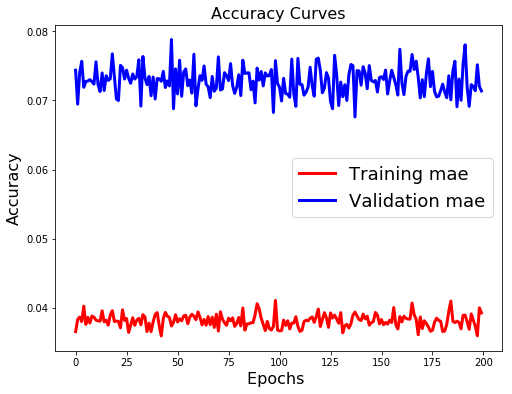

In [172]:
#Plotten der Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['mean_absolute_error'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_mean_absolute_error'],'b',linewidth=3.0)
plt.legend(['Training mae', 'Validation mae'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [173]:
# Vorhersage generieren
predictions_100N = model.predict(Xtest_100)
predictions_train_100N=model.predict(Xtrain_100)

# Prediction Denormalizing
testPredict_100=scaler.inverse_transform(predictions_100N)
trainPredict_100=scaler.inverse_transform(predictions_train_100N)

In [174]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_100_O, testPredict_100)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_100_O, trainPredict_100)
print('Train MSE: %.3f' % mse_train)

Test MSE: 41670950.879
Train MSE: 11844064.022


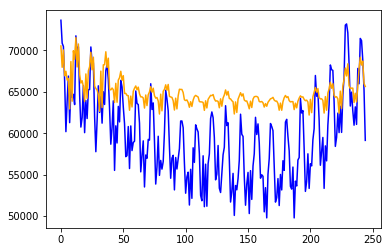

In [175]:
# Gegenüberstellung von Vorhersage und originalen Daten
plt.plot(ytest_100_O, color='blue') 
plt.plot(testPredict_100, color='orange') 
plt.show()

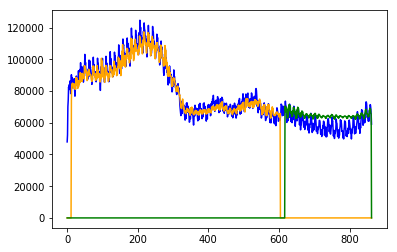

In [176]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_100))
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(window_size+look_forward-1):len(trainPredict_100)+(window_size+look_forward-1)] = trainPredict_100


# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot=testPredictPlot.reshape(len(ZR_100))
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(trainPredict_100)+2*(window_size+look_forward)-1:len(ZR_100)-1] = testPredict_100
     
       
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [177]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [178]:
# Modellanpassen: 46%
history_reg=model.fit(Xtrain_46, ytrain_46, epochs=200, batch_size=25, validation_data=(Xtest_46, ytest_46))

Train on 247 samples, validate on 127 samples
Epoch 1/200
247/247 [==============================] - 0s 506us/step - loss: 0.0030 - mean_absolute_error: 0.0438 - val_loss: 0.0066 - val_mean_absolute_error: 0.0685
Epoch 2/200
247/247 [==============================] - 0s 380us/step - loss: 0.0028 - mean_absolute_error: 0.0429 - val_loss: 0.0061 - val_mean_absolute_error: 0.0655
Epoch 3/200
247/247 [==============================] - 0s 454us/step - loss: 0.0024 - mean_absolute_error: 0.0406 - val_loss: 0.0050 - val_mean_absolute_error: 0.0592
Epoch 4/200
247/247 [==============================] - 0s 467us/step - loss: 0.0024 - mean_absolute_error: 0.0395 - val_loss: 0.0049 - val_mean_absolute_error: 0.0579
Epoch 5/200
247/247 [==============================] - 0s 407us/step - loss: 0.0022 - mean_absolute_error: 0.0378 - val_loss: 0.0042 - val_mean_absolute_error: 0.0533
Epoch 6/200
247/247 [==============================] - 0s 513us/step - loss: 0.0020 - mean_absolute_error: 0.0360 - val

Epoch 98/200
247/247 [==============================] - 0s 405us/step - loss: 0.0015 - mean_absolute_error: 0.0301 - val_loss: 0.0015 - val_mean_absolute_error: 0.0316
Epoch 99/200
247/247 [==============================] - 0s 426us/step - loss: 0.0017 - mean_absolute_error: 0.0325 - val_loss: 0.0015 - val_mean_absolute_error: 0.0321
Epoch 100/200
247/247 [==============================] - 0s 427us/step - loss: 0.0014 - mean_absolute_error: 0.0302 - val_loss: 0.0015 - val_mean_absolute_error: 0.0317
Epoch 101/200
247/247 [==============================] - 0s 369us/step - loss: 0.0014 - mean_absolute_error: 0.0303 - val_loss: 0.0014 - val_mean_absolute_error: 0.0309
Epoch 102/200
247/247 [==============================] - 0s 457us/step - loss: 0.0015 - mean_absolute_error: 0.0304 - val_loss: 0.0015 - val_mean_absolute_error: 0.0310
Epoch 103/200
247/247 [==============================] - 0s 438us/step - loss: 0.0016 - mean_absolute_error: 0.0321 - val_loss: 0.0014 - val_mean_absolute_er

247/247 [==============================] - 0s 389us/step - loss: 0.0013 - mean_absolute_error: 0.0287 - val_loss: 0.0013 - val_mean_absolute_error: 0.0300
Epoch 195/200
247/247 [==============================] - 0s 372us/step - loss: 0.0014 - mean_absolute_error: 0.0293 - val_loss: 0.0013 - val_mean_absolute_error: 0.0299
Epoch 196/200
247/247 [==============================] - 0s 362us/step - loss: 0.0014 - mean_absolute_error: 0.0299 - val_loss: 0.0013 - val_mean_absolute_error: 0.0299
Epoch 197/200
247/247 [==============================] - 0s 358us/step - loss: 0.0014 - mean_absolute_error: 0.0298 - val_loss: 0.0013 - val_mean_absolute_error: 0.0292
Epoch 198/200
247/247 [==============================] - 0s 372us/step - loss: 0.0015 - mean_absolute_error: 0.0310 - val_loss: 0.0015 - val_mean_absolute_error: 0.0317
Epoch 199/200
247/247 [==============================] - 0s 371us/step - loss: 0.0015 - mean_absolute_error: 0.0305 - val_loss: 0.0015 - val_mean_absolute_error: 0.0315


Text(0.5,1,'Loss Curves')

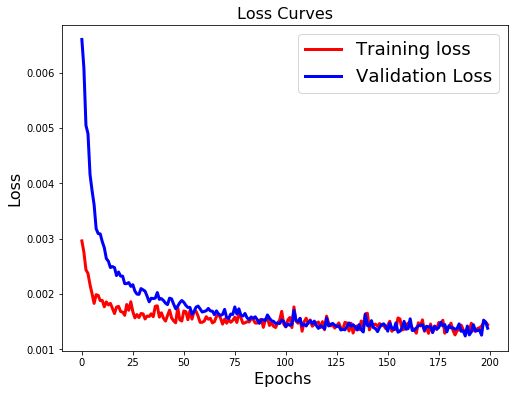

In [179]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

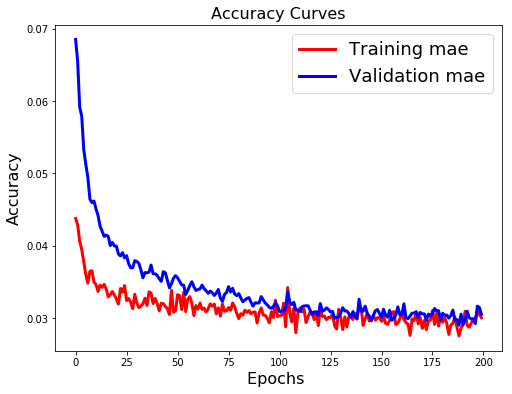

In [180]:
#Plotten der Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['mean_absolute_error'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_mean_absolute_error'],'b',linewidth=3.0)
plt.legend(['Training mae', 'Validation mae'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [181]:
# Vorhersage generieren
predictions_46N = model.predict(Xtest_46)
predictions_train_46N=model.predict(Xtrain_46)

# Prediction Denormalizing
testPredict_46=scaler.inverse_transform(predictions_46N)
trainPredict_46=scaler.inverse_transform(predictions_train_46N)

In [182]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_46_O, testPredict_46)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_46_O, trainPredict_46)
print('Train MSE: %.3f' % mse_train)

Test MSE: 8112508.257
Train MSE: 6922209.038


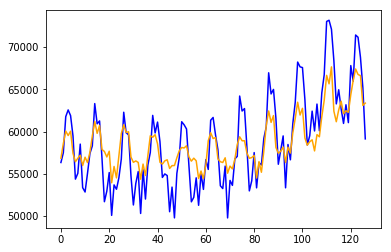

In [183]:
# Gegenüberstellung von Vorhersage und originalen Daten
plt.plot(ytest_46_O, color='blue') 
plt.plot(testPredict_46, color='orange') 
plt.show()

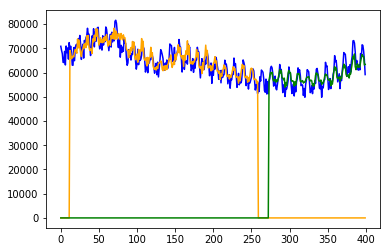

In [184]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_46)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_46))
trainPredictPlot[:]=[0]*len(ZR_46)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_46),1)
trainPredictPlot[(window_size+look_forward-1):len(trainPredict_46)+(window_size+look_forward-1)] = trainPredict_46


# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_46)
testPredictPlot=testPredictPlot.reshape(len(ZR_46))
testPredictPlot[:]=[0]*len(ZR_46)
testPredictPlot = testPredictPlot.reshape(len(ZR_46),1)
testPredictPlot[len(trainPredict_46)+2*(window_size+look_forward):len(ZR_100)-1] = testPredict_46
     
       
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_46, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [185]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [186]:
# Modellanpassen: 12%
history_reg=model.fit(Xtrain_12, ytrain_12, epochs=200, batch_size=25, validation_data=(Xtest_12, ytest_12))

Train on 52 samples, validate on 22 samples
Epoch 1/200
52/52 [==============================] - 0s 692us/step - loss: 0.0014 - mean_absolute_error: 0.0309 - val_loss: 0.0025 - val_mean_absolute_error: 0.0421
Epoch 2/200
52/52 [==============================] - 0s 500us/step - loss: 0.0013 - mean_absolute_error: 0.0298 - val_loss: 0.0024 - val_mean_absolute_error: 0.0421
Epoch 3/200
52/52 [==============================] - 0s 596us/step - loss: 0.0011 - mean_absolute_error: 0.0280 - val_loss: 0.0023 - val_mean_absolute_error: 0.0406
Epoch 4/200
52/52 [==============================] - 0s 654us/step - loss: 0.0013 - mean_absolute_error: 0.0295 - val_loss: 0.0019 - val_mean_absolute_error: 0.0380
Epoch 5/200
52/52 [==============================] - 0s 558us/step - loss: 0.0011 - mean_absolute_error: 0.0273 - val_loss: 0.0017 - val_mean_absolute_error: 0.0357
Epoch 6/200
52/52 [==============================] - 0s 519us/step - loss: 0.0015 - mean_absolute_error: 0.0301 - val_loss: 0.0017 

Epoch 50/200
52/52 [==============================] - 0s 1ms/step - loss: 9.4989e-04 - mean_absolute_error: 0.0248 - val_loss: 9.7438e-04 - val_mean_absolute_error: 0.0254
Epoch 51/200
52/52 [==============================] - 0s 788us/step - loss: 9.4300e-04 - mean_absolute_error: 0.0245 - val_loss: 0.0017 - val_mean_absolute_error: 0.0348
Epoch 52/200
52/52 [==============================] - 0s 596us/step - loss: 8.4985e-04 - mean_absolute_error: 0.0236 - val_loss: 0.0026 - val_mean_absolute_error: 0.0456
Epoch 53/200
52/52 [==============================] - 0s 904us/step - loss: 9.2785e-04 - mean_absolute_error: 0.0252 - val_loss: 0.0026 - val_mean_absolute_error: 0.0453
Epoch 54/200
52/52 [==============================] - 0s 731us/step - loss: 9.1704e-04 - mean_absolute_error: 0.0253 - val_loss: 0.0015 - val_mean_absolute_error: 0.0328
Epoch 55/200
52/52 [==============================] - 0s 558us/step - loss: 8.9666e-04 - mean_absolute_error: 0.0240 - val_loss: 8.8441e-04 - val_me

Epoch 98/200
52/52 [==============================] - 0s 904us/step - loss: 9.2544e-04 - mean_absolute_error: 0.0241 - val_loss: 0.0022 - val_mean_absolute_error: 0.0407
Epoch 99/200
52/52 [==============================] - 0s 1ms/step - loss: 9.9691e-04 - mean_absolute_error: 0.0259 - val_loss: 0.0017 - val_mean_absolute_error: 0.0351
Epoch 100/200
52/52 [==============================] - 0s 538us/step - loss: 7.4153e-04 - mean_absolute_error: 0.0218 - val_loss: 0.0013 - val_mean_absolute_error: 0.0287
Epoch 101/200
52/52 [==============================] - 0s 538us/step - loss: 8.1105e-04 - mean_absolute_error: 0.0238 - val_loss: 0.0011 - val_mean_absolute_error: 0.0265
Epoch 102/200
52/52 [==============================] - 0s 692us/step - loss: 7.7966e-04 - mean_absolute_error: 0.0234 - val_loss: 9.7969e-04 - val_mean_absolute_error: 0.0244
Epoch 103/200
52/52 [==============================] - 0s 749us/step - loss: 8.2597e-04 - mean_absolute_error: 0.0233 - val_loss: 9.5243e-04 - va

52/52 [==============================] - 0s 674us/step - loss: 7.6688e-04 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_mean_absolute_error: 0.0271
Epoch 193/200
52/52 [==============================] - 0s 538us/step - loss: 7.5998e-04 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_mean_absolute_error: 0.0271
Epoch 194/200
52/52 [==============================] - 0s 558us/step - loss: 8.1806e-04 - mean_absolute_error: 0.0238 - val_loss: 0.0010 - val_mean_absolute_error: 0.0241
Epoch 195/200
52/52 [==============================] - 0s 538us/step - loss: 8.2490e-04 - mean_absolute_error: 0.0224 - val_loss: 8.7650e-04 - val_mean_absolute_error: 0.0208
Epoch 196/200
52/52 [==============================] - 0s 500us/step - loss: 7.2120e-04 - mean_absolute_error: 0.0214 - val_loss: 9.2612e-04 - val_mean_absolute_error: 0.0224
Epoch 197/200
52/52 [==============================] - 0s 558us/step - loss: 6.8483e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0010 - val_mean_abs

In [187]:
# Vorhersage generieren
predictions_12N = model.predict(Xtest_12)
predictions_train_12N=model.predict(Xtrain_12)

# Prediction Denormalizing
testPredict_12=scaler.inverse_transform(predictions_12N)
trainPredict_12=scaler.inverse_transform(predictions_train_12N)

In [188]:
# Modellperformance bewerten
mse = mean_squared_error(ytest_12_O, testPredict_12)
print('Test MSE: %.3f' % mse)

mse_train = mean_squared_error(ytrain_12_O, trainPredict_12)
print('Train MSE: %.3f' % mse_train)

Test MSE: 8153223.188
Train MSE: 4497953.407


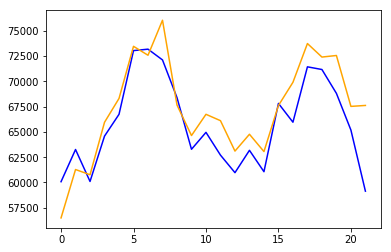

In [189]:
# Gegenüberstellung von Vorhersage und originalen Daten
plt.plot(ytest_12_O, color='blue') 
plt.plot(testPredict_12, color='orange') 
plt.show()

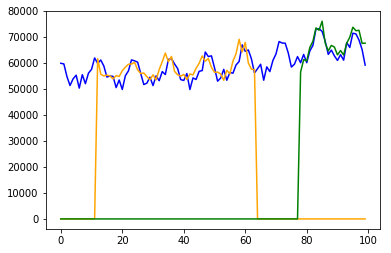

In [190]:
# Verschiebung der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_12)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_12))
trainPredictPlot[:]=[0]*len(ZR_12)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_12),1)
trainPredictPlot[(window_size+look_forward-1):len(trainPredict_12)+(window_size+look_forward-1)] = trainPredict_12

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_12)
testPredictPlot=testPredictPlot.reshape(len(ZR_12))
testPredictPlot[:]=[0]*len(ZR_12)
testPredictPlot = testPredictPlot.reshape(len(ZR_12),1)
testPredictPlot[len(trainPredict_12)+2*(window_size+look_forward):len(ZR_100)-1] = testPredict_12
     
       
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_12, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()